In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [2]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)


In [3]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
df = df[features + ['Survived']].dropna()
X = df[features].values
y = df['Survived'].values.reshape(-1, 1)


In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
input_size = X_train.shape[1]
hidden_size = 4
output_size = 1
learning_rate = 0.01
epochs = 50


In [6]:
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))


In [7]:
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))


In [8]:

losses = []
for epoch in range(epochs):
    z1 = np.dot(X_train, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    
    loss = -np.mean(y_train * np.log(a2) + (1-y_train) * np.log(1-a2))
    losses.append(loss)
    
    dz2 = a2 - y_train
    dW2 = np.dot(a1.T, dz2) / X_train.shape[0]
    db2 = np.sum(dz2, axis=0, keepdims=True) / X_train.shape[0]
    
    dz1 = np.dot(dz2, W2.T) * (z1 > 0)  
    dW1 = np.dot(X_train.T, dz1) / X_train.shape[0]
    db1 = np.sum(dz1, axis=0, keepdims=True) / X_train.shape[0]
    
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 1.6651
Epoch 10, Loss: 1.5302
Epoch 20, Loss: 1.4122
Epoch 30, Loss: 1.3081
Epoch 40, Loss: 1.2183


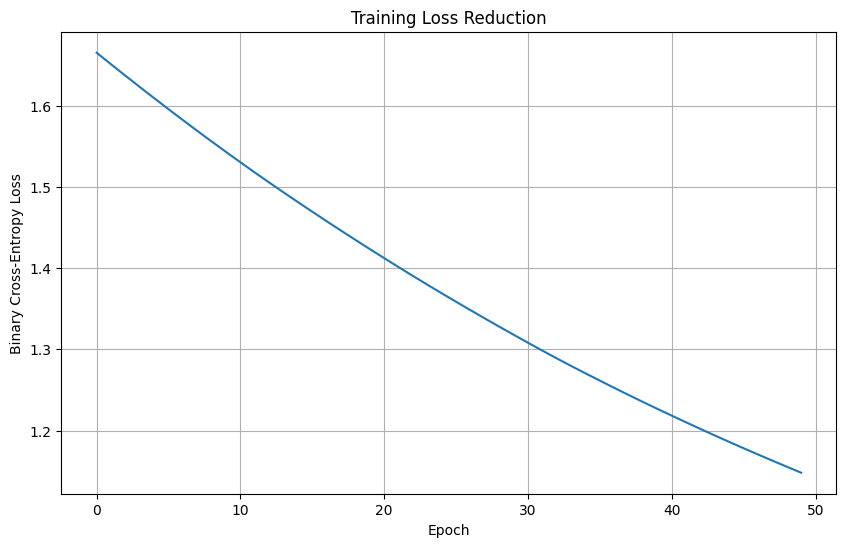

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(losses)
plt.title("Training Loss Reduction")
plt.xlabel("Epoch")
plt.ylabel("Binary Cross-Entropy Loss")
plt.grid(True)
plt.show()
